# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Correlation
### VIDEO: Kendall correlation
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

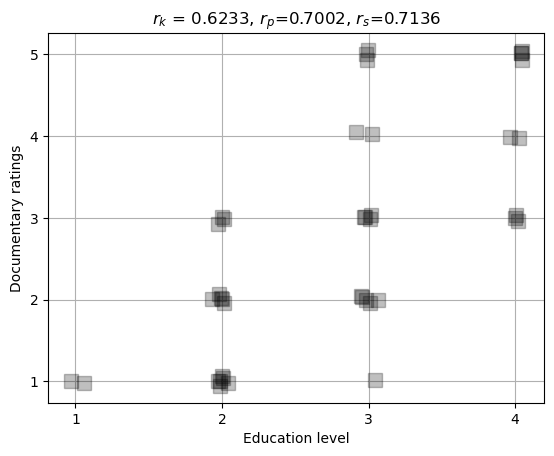

In [2]:
## generate some data!

N = 40

# movie ratings
docuRatings = np.random.randint(low=1,high=6,size=N)

# education level (1-4, correlated with docuRatings)
eduLevel = np.ceil( (docuRatings + np.random.randint(low=1,high=5,size=N) )/9 * 4 )

# compute the correlations
cr = [0,0,0]
cr[0] = stats.kendalltau(eduLevel,docuRatings)[0]
cr[1] = stats.pearsonr(eduLevel,docuRatings)[0]
cr[2] = stats.spearmanr(eduLevel,docuRatings)[0]

# round for convenience
cr = np.round(cr,4)


# plot the data
plt.plot(eduLevel+np.random.randn(N)/30,docuRatings+np.random.randn(N)/30,'ks',markersize=10,markerfacecolor=[0,0,0,.25])
plt.xticks(np.arange(4)+1)
plt.yticks(np.arange(5)+1)
plt.xlabel('Education level')
plt.ylabel('Documentary ratings')
plt.grid()
plt.title('$r_k$ = %g, $r_p$=%g, $r_s$=%g'%(cr[0],cr[1],cr[2]))

plt.show()

In [ ]:
## correlation estimation errors under H0

numExprs = 1000
nValues = 50
nCategories = 6

c = np.zeros((numExprs,3))

for i in range(numExprs):
    
    # create data
    x = np.random.randint(low=0,high=nCategories,size=nValues)
    y = np.random.randint(low=0,high=nCategories,size=nValues)
    
    # store correlations
    c[i,:] = [ stats.kendalltau(x,y)[0],
               stats.pearsonr(x,y)[0],
               stats.spearmanr(x,y)[0] ]
print(c)

In [ ]:
## show the graphs
plt.bar(range(3),np.mean(c**2,axis=0))
plt.errorbar(range(3),np.mean(c**2,axis=0),yerr=np.std(c**2,ddof=1,axis=0))
plt.xticks(range(3),('Kendall','Pearson','Spearman'))
plt.ylabel('Squared correlation error')
plt.title('Noise correlation ($r^2$) distributions')
plt.show()


plt.plot(c[:100,:],'s-')
plt.xlabel('Experiment number')
plt.ylabel('Correlation value')
plt.legend(('K','P','S'))
plt.show()


plt.imshow(np.corrcoef(c.T),vmin=.9,vmax=1)
plt.xticks(range(3),['K','P','S'])
plt.yticks(range(3),('K','P','S'))
plt.colorbar()
plt.title('Correlation matrix')
plt.show()